# Credit Risk

https://drive.google.com/file/d/18fuLcW2ZSi4gz_ENkDFpySuS5s53GNYf/view?usp=sharing

El conjunto de datos proporcionado representa información sobre riesgo crediticio generada por un banco internacional con operaciones en Argentina. Estos datos han sido transformados y enriquecidos para reflejar diferentes situaciones y comportamientos de pago de los clientes que podrían afectar la precisión de los modelos de predicción de riesgos. El ejercicio consiste en identificar y analizar posibles sesgos en variables clave del conjunto de datos, tales como la edad del cliente, el monto del préstamo y el tipo de empleo, utilizando métodos de estadística descriptiva, pruebas de hipótesis y visualizaciones.


**Parte 1: Comprensión y Preparación de Datos**

Explorar el conjunto de datos. Utiliza métodos descriptivos para obtener una comprensión general de las características del conjunto de datos (por ejemplo, .describe(), .info()). Identificar valores atípicos. Genera estadísticas descriptivas y visualizaciones (boxplots, scatter plots) para identificar outliers en 'monto_del_prestamo'.

**Parte 2: Análisis Exploratorio de Datos**
Análisis de sesgos por edad. Usa groupby para calcular la tasa de incumplimiento promedio por grupo de edad. Crea histogramas de edad para deudores y no deudores. Realiza un t-test para comparar las tasas de incumplimiento entre menores de edad y otros grupos de edad. Análisis de sesgos por monto del préstamo. Genera histogramas de 'monto_del_prestamo' para visualizar la distribución de los montos para deudores y no deudores. Compara las distribuciones de 'monto_del_prestamo' entre buenos y malos pagadores con un t-test. Análisis de sesgos por tipo de empleo. Usa groupby para comparar las tasas de incumplimiento entre diferentes tipos de empleo. Explora la relación entre el estado laboral y la tasa de incumplimiento con visualizaciones adecuadas.

**Parte 3: Preparación de Datos para Modelado**
Limpieza de Datos. Asegúrate de que todos los datos estén correctamente codificados y de que no haya valores faltantes o irrelevantes en el conjunto de datos.
Selección de Características. Decide qué variables incluir en el modelo. Considera excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

**Parte 4: Modelado**
Entrenar un Modelo de Clasificación. Utiliza DecisionTreeClassifier para entrenar un modelo predictivo con los datos procesados.
Evaluación del Modelo. Genera una matriz de confusión para evaluar el rendimiento del modelo. Calcula la precisión, el recall y la exactitud del modelo.



In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df_credit_risk = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/modelos_segundo_parcial/credit_risk/credit_risk.csv")
df_credit_risk = df_credit_risk.copy()

In [3]:
df_credit_risk.head()

,,incumplimiento,tipo_de_cuenta,genero,edad_del_cliente,co_solicitantes,dependientes,monto_del_prestamo,ubicacion_de_sucursal,nivel_de_producto,estatus_laboral,es_sostenedor_principal,grupo_de_puntaje_crediticio,area_residencial,estado_actual_de_la_cuenta,tiene_cuenta_conjunta,indicador_aleatorio,residencial_Rural,residencial_Suburbana,residencial_Urbana
0,0,1.0,3,male,26.618129,1,0,7.2500,Suburbana,Third,man,True,,Urbana,no,0,0.9494354298674084,0.0,0.0,1.0
1,1,1.0,3,female,27.395476,1,0,71.2833,Central,First,woman,False,C,Urbana,yes,0,0.0152425151741839,0.0,0.0,1.0
2,2,1.0,1,female,48.696543,0,0,7.9250,Suburbana,Third,woman,False,,Rural,yes,1,0.6723719434749519,1.0,0.0,0.0
3,3,1.0,3,female,25.491890,1,0,53.1000,Suburbana,First,woman,False,C,Urbana,yes,0,0.4035980372889746,0.0,0.0,1.0
4,4,0.0,1,male,41.038217,0,0,8.0500,Suburbana,Third,man,True,,Suburbana,no,1,0.8529009409462249,0.0,1.0,0.0


___

## **Parte 1: Comprensión y Preparación de Datos**

In [4]:
df_credit_risk.columns

Index(['    ', 'incumplimiento ', 'tipo_de_cuenta ', 'genero ',
       'edad_del_cliente   ', 'co_solicitantes ', 'dependientes ',
       'monto_del_prestamo ', 'ubicacion_de_sucursal ', 'nivel_de_producto ',
       'estatus_laboral          ', 'es_sostenedor_principal ',
       'grupo_de_puntaje_crediticio ', 'area_residencial ',
       'estado_actual_de_la_cuenta ', 'tiene_cuenta_conjunta ',
       'indicador_aleatorio    ', 'residencial_Rural ',
       'residencial_Suburbana ', 'residencial_Urbana'],
      dtype='object')

In [5]:
from funciones.eda_y_ml import whitespace_remover_and_columns
df_credit_risk = whitespace_remover_and_columns(df_credit_risk)

### → Validación de la data

In [6]:
df_credit_risk.columns

Index(['', 'incumplimiento', 'tipo_de_cuenta', 'genero', 'edad_del_cliente',
       'co_solicitantes', 'dependientes', 'monto_del_prestamo',
       'ubicacion_de_sucursal', 'nivel_de_producto', 'estatus_laboral',
       'es_sostenedor_principal', 'grupo_de_puntaje_crediticio',
       'area_residencial', 'estado_actual_de_la_cuenta',
       'tiene_cuenta_conjunta', 'indicador_aleatorio', 'residencial_Rural',
       'residencial_Suburbana', 'residencial_Urbana'],
      dtype='object')

In [8]:
print("El dataset tiene " + str(df_credit_risk.shape[0])+ " filas.")
print("El dataset tiene " + str(df_credit_risk.shape[1])+ " columnas.")

El dataset tiene 1906 filas.
El dataset tiene 20 columnas.


In [7]:
from funciones.eda_y_ml import validate_columns 
validate_columns(df_credit_risk)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
,NaN,1906.0,0,0.0,"[112, 950, 692, 277, 814]"
incumplimiento,NaN,1906.0,0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0]"
tipo_de_cuenta,6,1906,0,0.0,"[Ahorro, Inversiones, 1, Inversiones, Ahorro]"
genero,4,1906,0,0.0,"[Mujer, Mujer, male, Mujer, Mujer]"
edad_del_cliente,NaN,1906.0,0,0.0,"[55.0, 87.0, 48.28185968815671, 52.0, 75.0]"
co_solicitantes,NaN,1906.0,0,0.0,"[2, 2, 0, 0, 1]"
dependientes,NaN,1906.0,0,0.0,"[2, 0, 0, 0, 1]"
monto_del_prestamo,NaN,1906.0,0,0.0,"[2532.0, 6081.0, 56.4958, 24166.0, 17027.0]"
ubicacion_de_sucursal,7,1906,0,0.0,"[Suiza, Suiza, Suburbana, Suiza, Suiza]"
nivel_de_producto,6,1906,0,0.0,"[Intermedio, Avanzado, Third, Avanzado, Interm..."


In [8]:
df_credit_risk.describe()

,,incumplimiento,edad_del_cliente,co_solicitantes,dependientes,monto_del_prestamo
count,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000
mean,477.158972,0.244491,44.572590,0.772298,1.228227,13629.753908
std,277.177678,0.429898,18.993413,0.995311,1.416017,16618.634074
min,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,238.000000,0.000000,27.000000,0.000000,0.000000,15.743775
50%,476.000000,0.000000,45.320818,0.000000,1.000000,3550.500000
75%,714.000000,0.000000,53.713813,1.000000,2.000000,26848.750000
max,999.000000,1.000000,89.000000,8.000000,6.000000,63610.000000


___

### →  Veo los tipos de datos con dtypes

In [9]:
df_credit_risk.head()

,,incumplimiento,tipo_de_cuenta,genero,edad_del_cliente,co_solicitantes,dependientes,monto_del_prestamo,ubicacion_de_sucursal,nivel_de_producto,estatus_laboral,es_sostenedor_principal,grupo_de_puntaje_crediticio,area_residencial,estado_actual_de_la_cuenta,tiene_cuenta_conjunta,indicador_aleatorio,residencial_Rural,residencial_Suburbana,residencial_Urbana
0,0,1.0,3,male,26.618129,1,0,7.2500,Suburbana,Third,man,True,,Urbana,no,0,0.9494354298674084,0.0,0.0,1.0
1,1,1.0,3,female,27.395476,1,0,71.2833,Central,First,woman,False,C,Urbana,yes,0,0.0152425151741839,0.0,0.0,1.0
2,2,1.0,1,female,48.696543,0,0,7.9250,Suburbana,Third,woman,False,,Rural,yes,1,0.6723719434749519,1.0,0.0,0.0
3,3,1.0,3,female,25.491890,1,0,53.1000,Suburbana,First,woman,False,C,Urbana,yes,0,0.4035980372889746,0.0,0.0,1.0
4,4,0.0,1,male,41.038217,0,0,8.0500,Suburbana,Third,man,True,,Suburbana,no,1,0.8529009409462249,0.0,1.0,0.0


In [10]:
df_credit_risk.dtypes

                                 int64
incumplimiento                 float64
tipo_de_cuenta                  object
genero                          object
edad_del_cliente               float64
co_solicitantes                  int64
dependientes                     int64
monto_del_prestamo             float64
ubicacion_de_sucursal           object
nivel_de_producto               object
estatus_laboral                 object
es_sostenedor_principal         object
grupo_de_puntaje_crediticio     object
area_residencial                object
estado_actual_de_la_cuenta      object
tiene_cuenta_conjunta           object
indicador_aleatorio             object
residencial_Rural               object
residencial_Suburbana           object
residencial_Urbana              object
dtype: object

___

### → Valores outliers

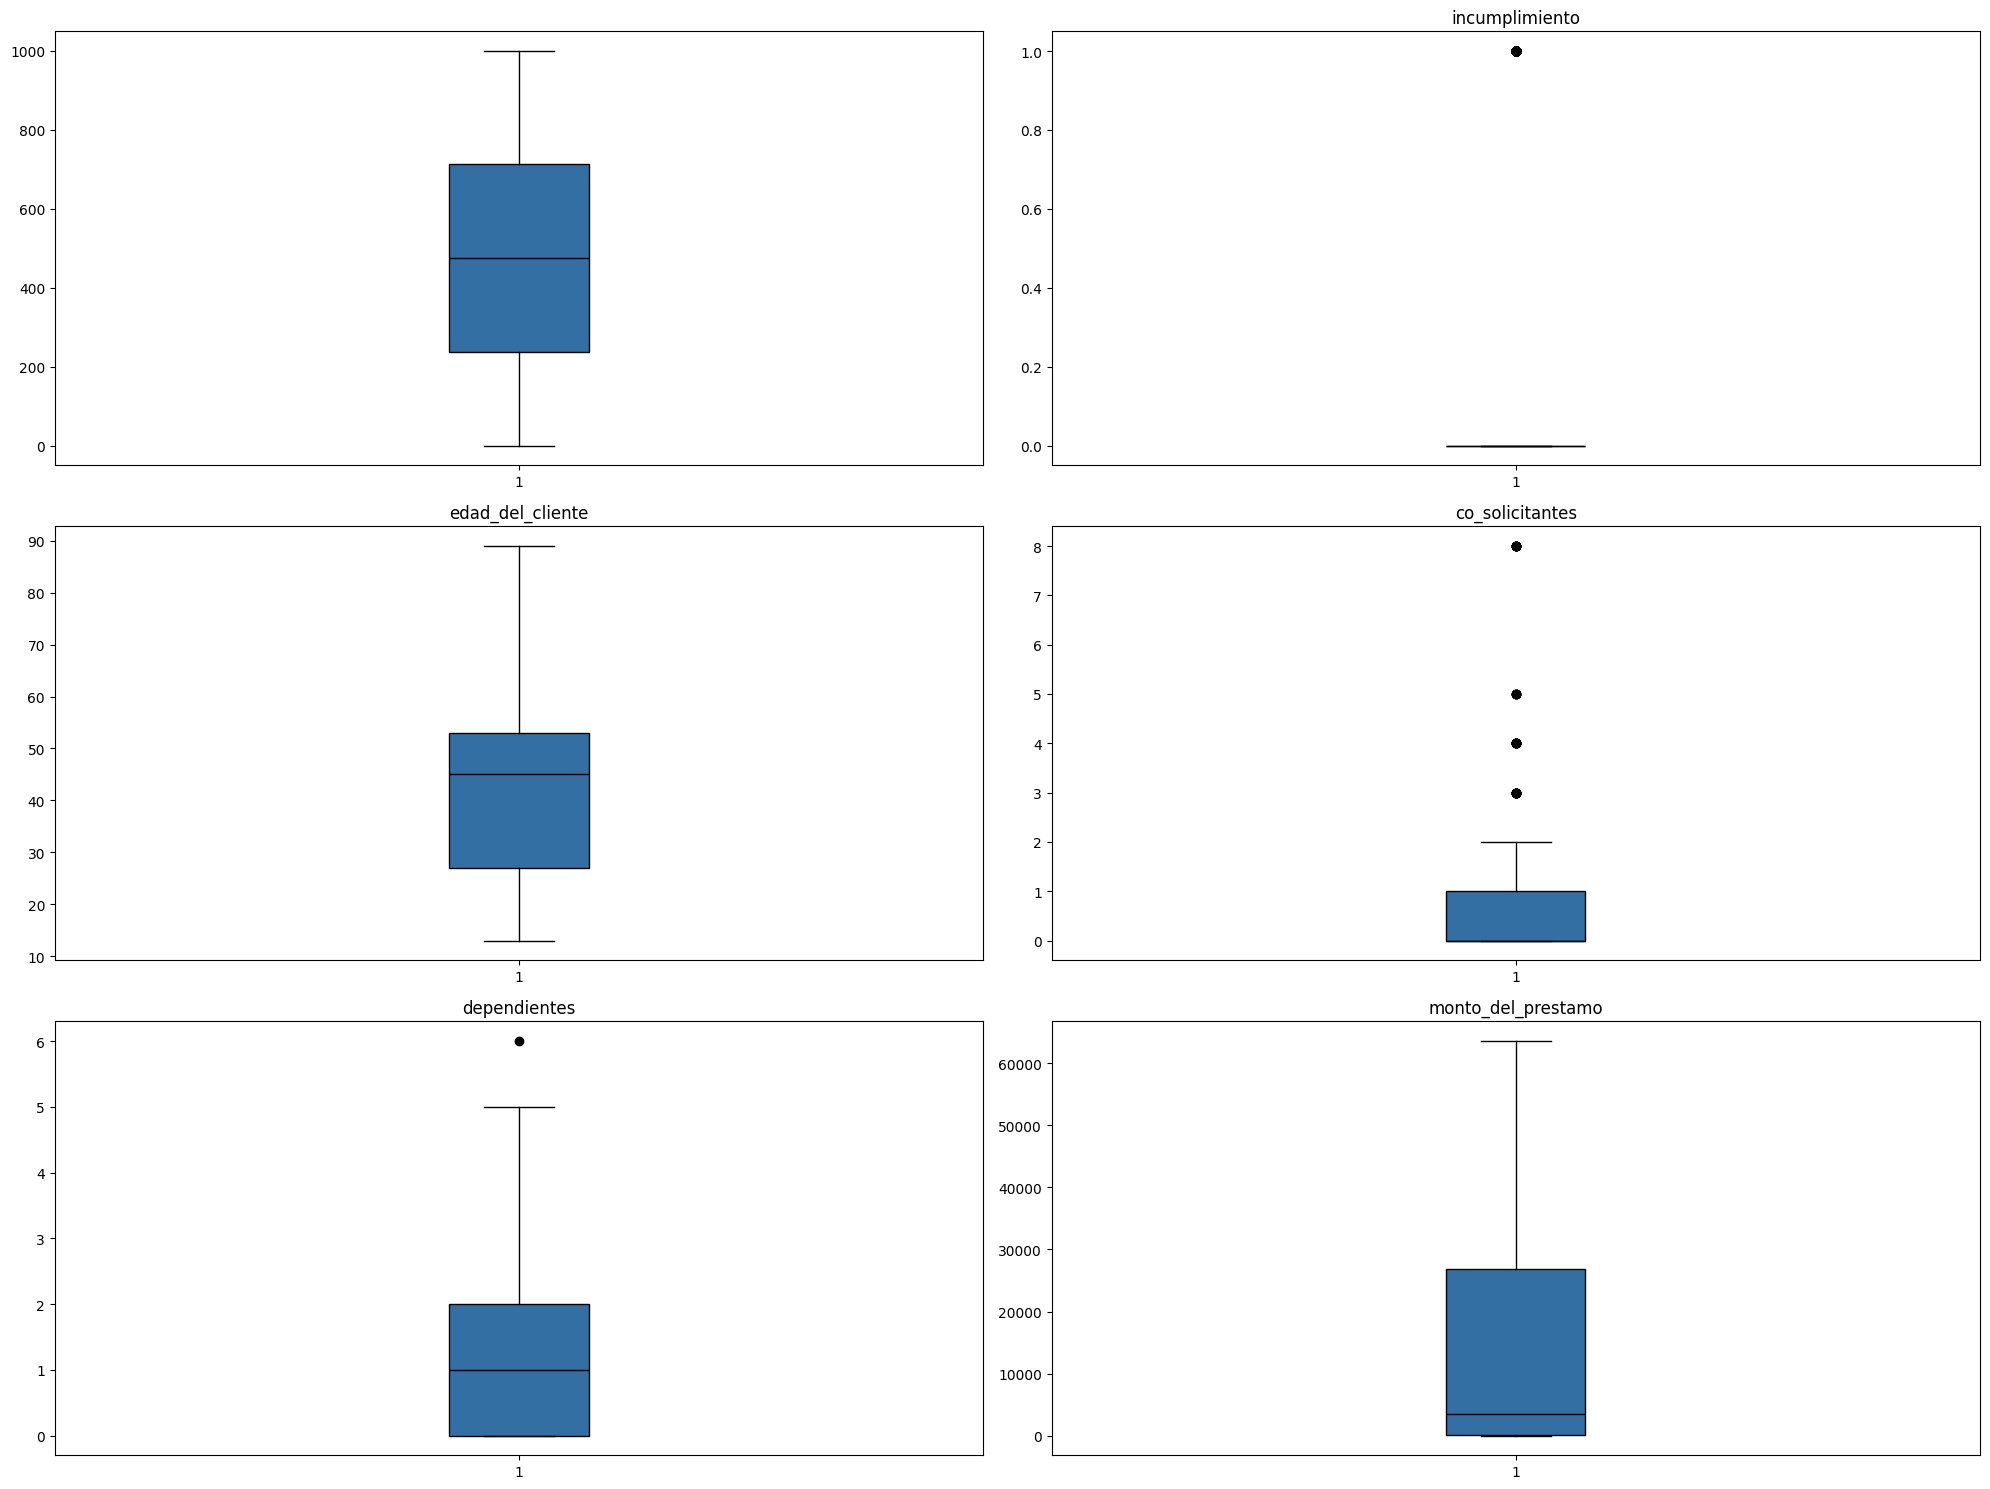

In [110]:
from funciones.eda_y_ml import plot_outliers
plot_outliers(df_credit_risk)

#### Para este análisis he tomado la decisión de no remover los outliers, ya que son valores que pueden ser reales y no errores de carga de datos. Además, al ser un dataset de créditos, es posible que existan valores altos de monto de préstamo.

____

## **Parte 2: Análisis Exploratorio de Datos**


### → Análisis de sesgos por edad. Usa groupby para calcular la tasa de incumplimiento promedio por grupo de edad. 

In [111]:
df_credit_risk["incumplimiento"].value_counts() # Miro cuantos cumplieron y cuantos no

incumplimiento
0.0    1440
1.0     466
Name: count, dtype: int64

In [112]:
tasa_de_incumplimiento_etaria = round(df_credit_risk.groupby("edad_del_cliente").agg({"incumplimiento" : "mean"}).reset_index(), 2)
tasa_de_incumplimiento_etaria # Tasa de incumplimiento promedio por grupo de edad

,edad_del_cliente,incumplimiento
0,13,1.00
1,16,1.00
2,17,1.00
3,18,0.56
4,19,0.41
...,...,...
70,85,0.00
71,86,0.00
72,87,0.00
73,88,0.00


In [113]:
tasa_de_incumplimiento_etaria["incumplimiento"].value_counts() # Solamente me interesa quedarme con 1 y 0. No me interesa el resto, entonces hago lo siguiente:

incumplimiento
0.00    34
0.06     4
1.00     3
0.17     2
0.56     2
0.25     2
0.19     2
0.14     2
0.12     2
0.50     2
0.18     2
0.58     2
0.41     2
0.15     1
0.04     1
0.07     1
0.23     1
0.22     1
0.27     1
0.03     1
0.24     1
0.30     1
0.60     1
0.57     1
0.49     1
0.52     1
0.08     1
Name: count, dtype: int64

In [37]:
tasa_de_incumplimiento_etaria["edad_del_cliente"].value_counts()

edad_del_cliente
25.34    4
47.65    4
46.89    4
46.85    4
45.59    3
        ..
29.35    1
29.38    1
29.40    1
29.48    1
89.00    1
Name: count, Length: 772, dtype: int64

In [117]:
tasa_de_incumplimiento_etaria = tasa_de_incumplimiento_etaria[~((tasa_de_incumplimiento_etaria["incumplimiento"] < 1) & (tasa_de_incumplimiento_etaria["incumplimiento"] > 0))]
tasa_de_incumplimiento_etaria

,edad_del_cliente,incumplimiento
0,13,1.0
1,16,1.0
2,17,1.0
24,39,0.0
26,41,0.0
42,57,0.0
44,59,0.0
45,60,0.0
46,61,0.0
47,62,0.0


In [40]:
df_credit_risk["edad_del_cliente"] = df_credit_risk["edad_del_cliente"].astype(int)
df_credit_risk.head()

,,incumplimiento,tipo_de_cuenta,genero,edad_del_cliente,co_solicitantes,dependientes,monto_del_prestamo,ubicacion_de_sucursal,nivel_de_producto,estatus_laboral,es_sostenedor_principal,grupo_de_puntaje_crediticio,area_residencial,estado_actual_de_la_cuenta,tiene_cuenta_conjunta,indicador_aleatorio,residencial_Rural,residencial_Suburbana,residencial_Urbana
0,0,1.0,3,male,26,1,0,7.2500,Suburbana,Third,man,True,,Urbana,no,0,0.9494354298674084,0.0,0.0,1.0
1,1,1.0,3,female,27,1,0,71.2833,Central,First,woman,False,C,Urbana,yes,0,0.0152425151741839,0.0,0.0,1.0
2,2,1.0,1,female,48,0,0,7.9250,Suburbana,Third,woman,False,,Rural,yes,1,0.6723719434749519,1.0,0.0,0.0
3,3,1.0,3,female,25,1,0,53.1000,Suburbana,First,woman,False,C,Urbana,yes,0,0.4035980372889746,0.0,0.0,1.0
4,4,0.0,1,male,41,0,0,8.0500,Suburbana,Third,man,True,,Suburbana,no,1,0.8529009409462249,0.0,1.0,0.0


In [115]:
tasa_de_incumplimiento_etaria2 = round(df_credit_risk.groupby("edad_del_cliente").agg({"incumplimiento" : "mean"}).reset_index(), 2)
tasa_de_incumplimiento_etaria2

,edad_del_cliente,incumplimiento
0,13,1.00
1,16,1.00
2,17,1.00
3,18,0.56
4,19,0.41
...,...,...
70,85,0.00
71,86,0.00
72,87,0.00
73,88,0.00


<Axes: xlabel='edad_del_cliente', ylabel='incumplimiento'>

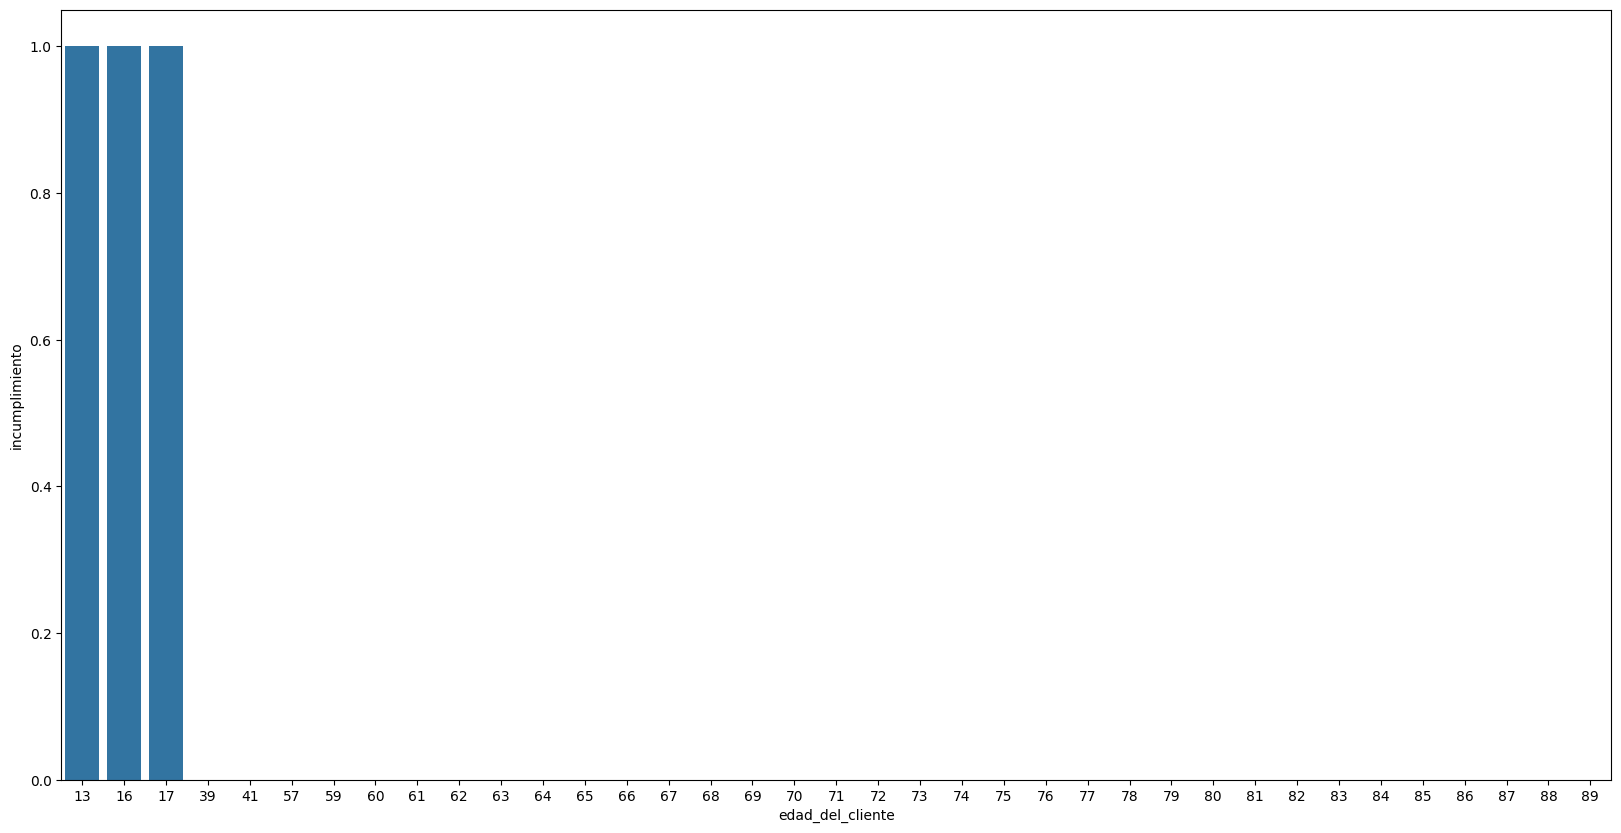

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(data=tasa_de_incumplimiento_etaria, x="edad_del_cliente", y="incumplimiento")

### Hay 2 grupos, o hasta 3 grupos de pagadores. Aquellos que están entre 13 y 17 años NO PAGAN, mientras que entre 18 y 58 si pagan (con una tasa baja de incumplimiento). Luego, a partir de los 58 años, pagan todos.

## Crea histogramas de edad para deudores y no deudores.

In [51]:
condicion_deudores = df_credit_risk["incumplimiento"] == 1
condicion_no_deudores = df_credit_risk["incumplimiento"] == 0

deudores = df_credit_risk[condicion_deudores]
no_deudores = df_credit_risk[condicion_no_deudores]

<Axes: xlabel='edad_del_cliente', ylabel='Count'>

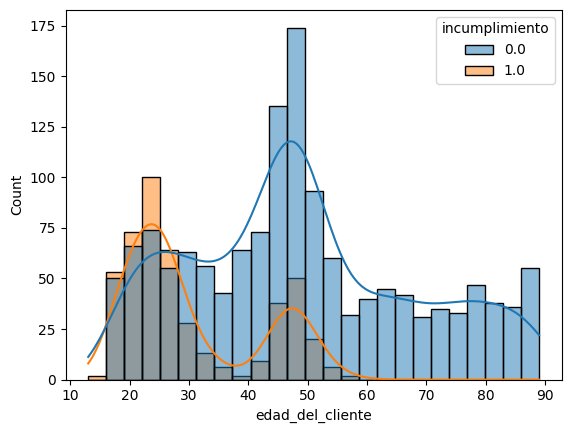

In [67]:
sns.histplot(df_credit_risk, x=df_credit_risk["edad_del_cliente"], hue=df_credit_risk["incumplimiento"], kde=True, bins=25)

### Realiza un t-test para comparar las tasas de incumplimiento entre menores de edad y otros grupos de edad. 

In [75]:
def grupo_etario (x):
    if x <= 18:
        return "adolescente"
    elif 18 < x <= 30:
        return "joven adulto"
    elif 30 < x < 50:
        return "adulto"
    elif x >= 50:
        return "mayor"
    

df_credit_risk["grupo_etario"] = df_credit_risk["edad_del_cliente"].apply(grupo_etario)
adolescentes = df_credit_risk[df_credit_risk["grupo_etario"] == "adolescente"]
mayores = df_credit_risk[df_credit_risk["grupo_etario"] == "mayor"]
    

#### hcaer mas comparaciones entre los grupos de edad


In [76]:
from scipy.stats import ttest_ind

group1 = adolescentes["incumplimiento"]
group2 = mayores["incumplimiento"]

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa de la tasa de incumplimiento entre los adolescentes y los mayores.")
else:
    print("No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de incumplimiento de ambos grupos")

Rechazar la hipótesis nula. Hay una diferencia significativa de la tasa de incumplimiento entre los adolescentes y los mayores.


### Análisis de sesgos por monto del préstamo. Genera histogramas de 'monto_del_prestamo' para visualizar la distribución de los montos para deudores y no deudores. 



<Axes: xlabel='monto_del_prestamo', ylabel='Count'>

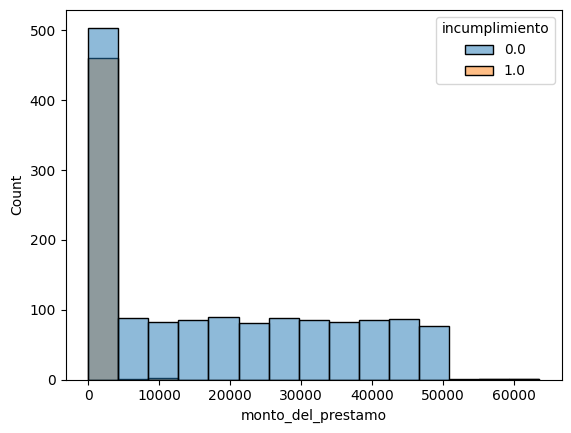

In [78]:
sns.histplot(data= df_credit_risk, x=df_credit_risk["monto_del_prestamo"], hue=df_credit_risk["incumplimiento"])

<Axes: xlabel='monto_del_prestamo', ylabel='Count'>

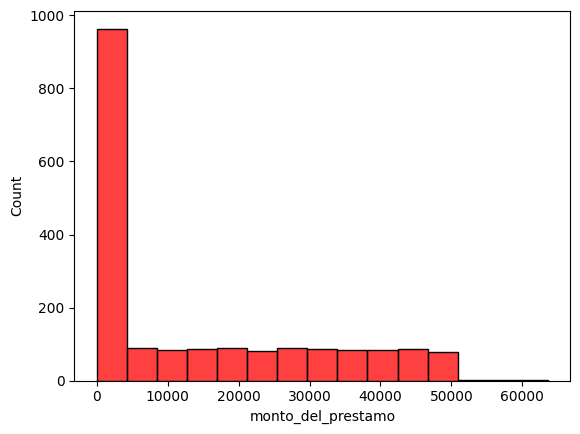

In [85]:
sns.histplot(data= df_credit_risk[df_credit_risk["incumplimiento"] == 1], x=df_credit_risk["monto_del_prestamo"], color="red")

<Axes: xlabel='monto_del_prestamo', ylabel='Count'>

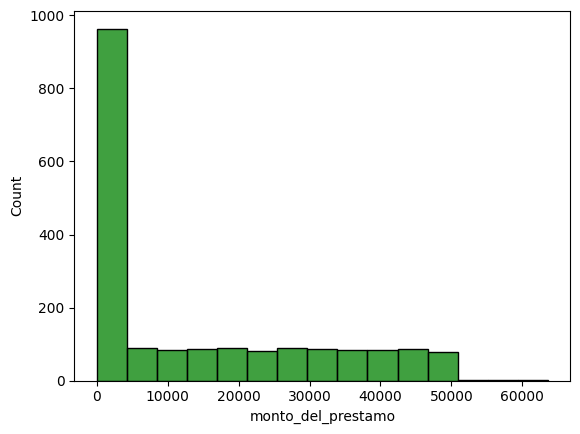

In [83]:
sns.histplot(data= df_credit_risk[df_credit_risk["incumplimiento"] == 0], x=df_credit_risk["monto_del_prestamo"], color="green")

### Compara las distribuciones de 'monto_del_prestamo' entre buenos y malos pagadores con un t-test. 

In [87]:
from scipy.stats import ttest_ind

group1 = deudores["monto_del_prestamo"]
group2 = no_deudores["monto_del_prestamo"]

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa en el monto del prestamo entre los deudores y los no deudores.")
else:
    print("No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de incumplimiento de ambos grupos")

Rechazar la hipótesis nula. Hay una diferencia significativa en el monto del prestamo entre los deudores y los no deudores.


### Análisis de sesgos por tipo de empleo. Usa groupby para comparar las tasas de incumplimiento entre diferentes tipos de empleo. Explora la relación entre el estado laboral y la tasa de incumplimiento con visualizaciones adecuadas.

In [93]:
df_credit_risk["estatus_laboral"].value_counts()

estatus_laboral
man                         538
Desempleo                   274
woman                       273
Estudiante                  255
Empleo                      249
Retirado                    222
child                        85
Desempleado                   8
Empleo a tiempo parcial       1
Empleo a tiempo completo      1
Name: count, dtype: int64

In [94]:
df_credit_risk.columns

Index(['', 'incumplimiento', 'tipo_de_cuenta', 'genero', 'edad_del_cliente',
       'co_solicitantes', 'dependientes', 'monto_del_prestamo',
       'ubicacion_de_sucursal', 'nivel_de_producto', 'estatus_laboral',
       'es_sostenedor_principal', 'grupo_de_puntaje_crediticio',
       'area_residencial', 'estado_actual_de_la_cuenta',
       'tiene_cuenta_conjunta', 'indicador_aleatorio', 'residencial_Rural',
       'residencial_Suburbana', 'residencial_Urbana', 'grupo_etario'],
      dtype='object')

In [103]:
df_credit_risk_empleo = df_credit_risk[~((df_credit_risk["estatus_laboral"] == "man") | (df_credit_risk["estatus_laboral"] == "woman") | (df_credit_risk["estatus_laboral"] == "child"))]
df_credit_risk_empleo["estatus_laboral"].value_counts()

estatus_laboral
Desempleo                   274
Estudiante                  255
Empleo                      249
Retirado                    222
Desempleado                   8
Empleo a tiempo parcial       1
Empleo a tiempo completo      1
Name: count, dtype: int64

In [105]:
empleo_incumplimiento = df_credit_risk_empleo.groupby("estatus_laboral").agg({"incumplimiento": "mean"}).reset_index()
empleo_incumplimiento

,estatus_laboral,incumplimiento
0,Desempleado,0.875
1,Desempleo,0.000
2,Empleo,0.000
3,Empleo a tiempo completo,1.000
4,Empleo a tiempo parcial,0.000
5,Estudiante,0.000
6,Retirado,0.000


___

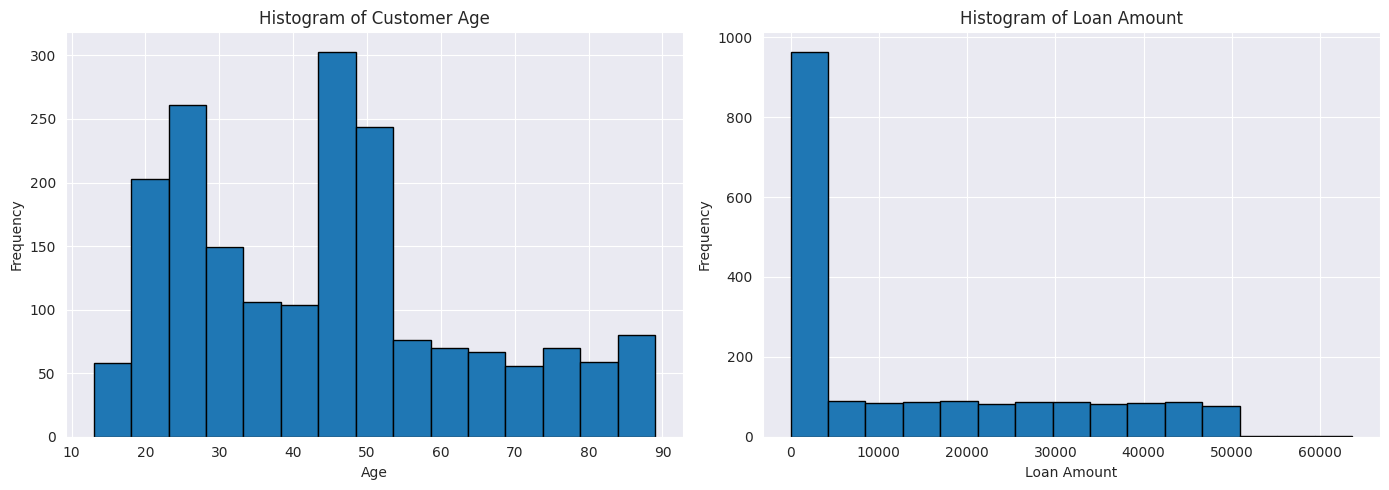

In [42]:
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(14, 5))

# Histogram for customer_age
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['edad_del_cliente'], bins=15, edgecolor='black')
plt.title('Histogram of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for loan_amount
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df['monto_del_prestamo'], bins=15, edgecolor='black')
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


/home/fede/.pyenv/versions/3.10.6/envs/default/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fede/.pyenv/versions/3.10.6/envs/default/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


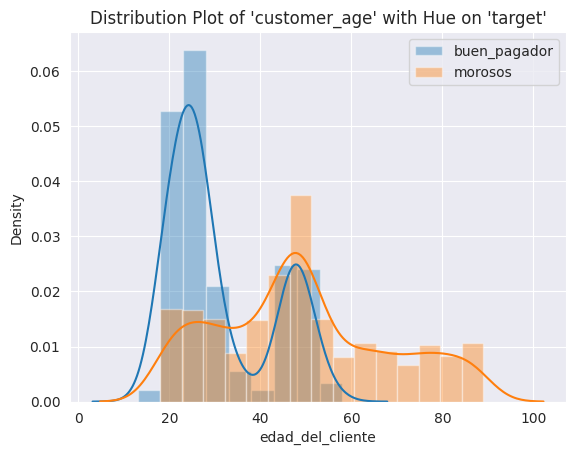

In [43]:
filtro1 = df["incumplimiento"] == 0
filtro2 = df["incumplimiento"] == 1

sns.distplot(df[filtro2]['edad_del_cliente'], label="buen_pagador")
sns.distplot(df[filtro1]['edad_del_cliente'], label="morosos")

plt.title("Distribution Plot of 'customer_age' with Hue on 'target'")
plt.legend()
plt.show()

# Generar modelo

In [5]:
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating metrics manually using the confusion matrix
tp, fn, fp, tn = conf_matrix.ravel()

# Metrics calculation
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Handling the case where tp + fp is 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0     # Handling the case where tp + fn is 0